# dev tip filtering 3
using displacement method to compute tip positions
and then recording the nearest instantaneous tip.

In [2]:
from lib.my_initialization import *

# from lib.my_initialization import *
from lib.model.minimal_model import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.viewer import *
import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [3]:
# #make plots in darkmode
# import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
PlotMyDomain

NameError: name 'PlotMyDomain' is not defined

# detect tips via WJ's method with given timestep, ∆t>0.

In [ ]:
# input_file_name=search_for_file()

In [ ]:
input_file_name="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.122.33.npz"
Delta_t=0.1
V_threshold=0.5
theta_threshold=0.
t=0.
txt=load_buffer(input_file_name)
width,height,chnl_no=txt.shape
zero_txt = txt.copy()*0.

In [ ]:
dtexture_dt = zero_txt.copy()
get_time_step(txt, dtexture_dt)
#compute the images to find isosurfaces of
img    = txt[...,0]
dimgdt = dtexture_dt[...,0]
img_nxt = img + Delta_t * dimgdt
dtxt_dt=dtexture_dt

In [ ]:
# find_intersections
# retval = find_intersections(img,dimgdt,level1,level2,theta_threshold=theta_threshold)
level1=V_threshold
level2=V_threshold
retval = find_intersections(img,img_nxt,level1,level2,theta_threshold=theta_threshold)
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
# EP states given by bilinear interpolation with periodic boundary conditions
v_lst, f_lst, s_lst = interpolate_states(x_values,y_values,width,height,txt)
dvdt_lst, dfdt_lst, dsdt_lst = interpolate_states(x_values,y_values,width,height,dtxt_dt)

n_tips = x_values.size
dict_out = {
    't': float(t),
    'n': int(n_tips),
    'x': tuple(lst_values_x),
    'y': tuple(lst_values_y),
    'theta': tuple(lst_values_theta),
    'grad_ux': tuple(lst_values_grad_ux),
    'grad_uy': tuple(lst_values_grad_uy),
    'grad_vx': tuple(lst_values_grad_vx),
    'grad_vy': tuple(lst_values_grad_vy),
    'v':v_lst,
    'f':f_lst,
    's':s_lst,
    'dvdt':dvdt_lst,
    'dfdt':dfdt_lst,
    'dsdt':dsdt_lst,
}
dict_out_lagged=dict_out
print(dict_out['n'])
lst_values_theta

In [ ]:
level1=V_threshold
level2=0.
retval = find_intersections(img,dimgdt,level1,level2,theta_threshold=theta_threshold)
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
# EP states given by bilinear interpolation with periodic boundary conditions
v_lst, f_lst, s_lst = interpolate_states(x_values,y_values,width,height,txt)
dvdt_lst, dfdt_lst, dsdt_lst = interpolate_states(x_values,y_values,width,height,dtxt_dt)

n_tips = x_values.size
dict_out = {
    't': float(t),
    'n': int(n_tips),
    'x': tuple(lst_values_x),
    'y': tuple(lst_values_y),
    'theta': tuple(lst_values_theta),
    'grad_ux': tuple(lst_values_grad_ux),
    'grad_uy': tuple(lst_values_grad_uy),
    'grad_vx': tuple(lst_values_grad_vx),
    'grad_vy': tuple(lst_values_grad_vy),
    'v':v_lst,
    'f':f_lst,
    's':s_lst,
    'dvdt':dvdt_lst,
    'dfdt':dfdt_lst,
    'dsdt':dsdt_lst,
}
dict_out_instant=dict_out
print(dict_out['n'])
lst_values_theta

# time step until t=100ms for an example trial

In [ ]:
input_file_name="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.122.33.npz"
Delta_t=0.1
V_threshold=0.5
theta_threshold=0.
t=0.
txt=load_buffer(input_file_name)
width,height,chnl_no=txt.shape
zero_txt = txt.copy()*0.

tf=100
h=0.001
FPS=int(1/h*10**3)
while t<tf:
    time_step(txt, h, zero_txt)
    t += h

In [ ]:
beep(4)

# for an array of Delta_t, record tip number until t=200ms, which is long enough for at least one high freq. birth-death event to occur

In [ ]:
tf=200
n1_lst=[]
n2_lst=[]
t_lst=[]
while t<tf:
    dtexture_dt = zero_txt.copy()
    get_time_step(txt, dtexture_dt)
    #compute the images to find isosurfaces of
    img    = txt[...,0]
    dimgdt = dtexture_dt[...,0]
    img_nxt = img + Delta_t * dimgdt
    dtxt_dt=dtexture_dt

    level1=V_threshold
    level2=V_threshold
    retval = find_intersections(img,img_nxt,level1,level2,theta_threshold=theta_threshold)
    lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
    x_values = np.array(lst_values_x)
    y_values = np.array(lst_values_y)
    # EP states given by bilinear interpolation with periodic boundary conditions
    v_lst, f_lst, s_lst = interpolate_states(x_values,y_values,width,height,txt)
    dvdt_lst, dfdt_lst, dsdt_lst = interpolate_states(x_values,y_values,width,height,dtxt_dt)

    n_tips = x_values.size
    n1_lst.append(n_tips)
    t_lst.append(t)

    level1=V_threshold
    level2=0.
    retval = find_intersections(img,dimgdt,level1,level2,theta_threshold=theta_threshold)
    lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
    x_values = np.array(lst_values_x)
    y_values = np.array(lst_values_y)
    # EP states given by bilinear interpolation with periodic boundary conditions
    v_lst, f_lst, s_lst = interpolate_states(x_values,y_values,width,height,txt)
    dvdt_lst, dfdt_lst, dsdt_lst = interpolate_states(x_values,y_values,width,height,dtxt_dt)

    n_tips = x_values.size
    n2_lst.append(n_tips)

    txt+=h*dtxt_dt
#     time_step(txt, h, zero_txt)
    t += h

In [ ]:
# beep(4)


In [ ]:
#TODO: load the existing tip log, with duplicates removed, and plot it versus time
#TODO: verify whether there are duplicates present in x_values
#TOOD(if ^those disagree): go to that disagreement and plot the number of spiral tips versus Delta_t
#TODO: spatially visualize ^this appearance/disappearance for a few Delta_t.  Do this with contours and stars.
FPS=int(1/h*10**3)
output_file_name=os.path.basename(input_file_name).replace('.npz',f'tipnum_vs_time_compare_methods_DT_{Delta_t}_FPS_{FPS:.0e}.csv')
input_folder=os.path.dirname(input_file_name)
assert(input_folder)
os.chdir(input_folder)
df = pd.DataFrame({
    't':t_lst,
    'n1':n1_lst,
    'n2':n2_lst
})
df.to_csv(output_file_name,index=False)

In [ ]:
#TODO: plot n1_lst and n2_lst versus time.  Do they ever disagree?
save=True
fontsize=22
x_values=np.array(t_lst)
y1_values=np.array(n1_lst)
y2_values=np.array(n2_lst)+1
plt.plot(x_values,y1_values,label=r"""comparing two times
separated by $\Delta t={:.1f}$ ms""".format(Delta_t))
plt.plot(x_values,y2_values,label="instantaneous method+1",alpha=0.7)
plt.ylabel('number of tips',fontsize=fontsize)
plt.xlabel('t (ms)',fontsize=fontsize)
plt.title(f'sampling rate: {FPS:.0e} FPS\n',fontsize=fontsize)
plt.tick_params(which='both',size=fontsize-2)
plt.tick_params(axis='both', labelsize=fontsize-2)
plt.ticklabel_format(style ='scientific',#'sci', # 'plain',# ,})
                     useMathText=True,
                     axis='both')
# plt.xlim([120,124])
plt.xlim([121.80,122])
plt.legend(fontsize=fontsize-4)
if not save:
    plt.show()
else:
    plt.tight_layout()
    try:
        os.mkdir('fig')
    except:
        pass
#     output_fig_file_name='fig/'+output_file_name.replace('.csv','.png')
    output_fig_file_name='fig/'+output_file_name.replace('.csv','very_zoomed.png')
    plt.savefig(output_fig_file_name,dpi=300)

In [ ]:
#define some functions

In [ ]:
def compute_tip_dict(img,dimgdt,level1,level2,theta_threshold=0.):
    '''
    Example Usage:
    dict_out = compute_tip_dict(img,dimgdt,level1,level2,theta_threshold=0.)
    '''
    width,height=img.shape[:2]
     # find_intersections
    retval = find_intersections(img,dimgdt,level1,level2,theta_threshold=theta_threshold)
    lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
    x_values = np.array(lst_values_x)
    y_values = np.array(lst_values_y)
    # EP states given by bilinear interpolation with periodic boundary conditions
    v_lst, f_lst, s_lst = interpolate_states(x_values,y_values,width,height,txt)
    dvdt_lst, dfdt_lst, dsdt_lst = interpolate_states(x_values,y_values,width,height,dtxt_dt)

    n_tips = x_values.size
    dict_out = {
        't': float(t),
        'n': int(n_tips),
        'x': tuple(lst_values_x),
        'y': tuple(lst_values_y),
        'theta': tuple(lst_values_theta),
        'grad_ux': tuple(lst_values_grad_ux),
        'grad_uy': tuple(lst_values_grad_uy),
        'grad_vx': tuple(lst_values_grad_vx),
        'grad_vy': tuple(lst_values_grad_vy),
        'v':v_lst,
        'f':f_lst,
        's':s_lst,
        'dvdt':dvdt_lst,
        'dfdt':dfdt_lst,
        'dsdt':dsdt_lst,
    }
    return dict_out

# Visualize the system when a high frequency birth death event occurs
- time of birth-death event that lasts for t=.05 seconds for both methods began at time $t=121.85$ ms for trial `ic_200x200.122.33.npz`

In [ ]:
input_file_name="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.122.33.npz"
Delta_t=0.1
V_threshold=0.5
theta_threshold=0.
t=0.
txt=load_buffer(input_file_name)
width,height,chnl_no=txt.shape
zero_txt = txt.copy()*0.

tf=121.85
h=0.001
FPS=int(1/h*10**3)
while t<tf:
    time_step(txt, h, zero_txt)
    t += h
    

In [ ]:
beep(5)

In [ ]:
#save the resulting buffer
file_name_primed_txt=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.2f}.npz')
folder_name_primed_txt=nb_dir+'/Data/test_data/methods'
os.chdir(folder_name_primed_txt)
# np.savez_compressed(file_name_primed_txt)
np.savez(file_name_primed_txt,txt)
print ( 'primed texture saved to:' )
print ( folder_name_primed_txt+'/'+file_name_primed_txt )

In [ ]:
dir_primed_txt="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85.npz"
assert(os.path.exists(file_name_primed_txt))
txt = load_buffer(dir_primed_txt)

In [ ]:
# get_tips(contours_img,contours_img_nxt)
# def show_buffer (txt,Delta_t,V_threshold = 0.5):#0.5
#compute the textures
V_threshold=0.5
theta_threshold=0.
Delta_t=1000
width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)
dtxt_dt = zero_txt.copy()
get_time_step(txt, dtxt_dt)
txt_nxt = dtxt_dt * Delta_t + txt
img = txt[..., 0]
img_nxt=txt_nxt[...,0]
dimg_dt=dtxt_dt[...,0]
#calculate contours and tips
contours_img = find_contours(img,         level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
contours_img_nxt = find_contours(img_nxt, level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
contours_dimgdt = find_contours(dimgdt,   level=0.,fully_connected='low', positive_orientation='low', mode='pbc')

#instantaneous tip detection 
# retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips

lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
# EP states given by bilinear interpolation with periodic boundary conditions
v_lst, f_lst, s_lst = interpolate_states(x_values,y_values,width,height,txt)
dvdt_lst, dfdt_lst, dsdt_lst = interpolate_states(x_values,y_values,width,height,dtxt_dt)
c_values = np.array(dsdt_lst)
n_tips=x_values.shape[0]
# bluf
print(f"the number of tips are {n_tips}.")
print(f"""x position of tips: {x_values}""")
print(f"""y position of tips: {y_values}""")

In [ ]:
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
save = False; inch = 6; 
vmin_img=0;vmax_img=.2;
V_threshold=0.5; Delta_t=10000;
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.2f}_DT_{Delta_t}.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')
#plot the system
# figsize=(15,15); max_marker_size=800; lw=2;color_values = None
#appears to work     contours1 = find_contours(img,    level = 0.5)
img_nxt=img+Delta_t*dimgdt
contours1 = find_contours(img,    level = V_threshold)
contours2 = find_contours(img_nxt,    level = V_threshold)
contours3 = find_contours(dimgdt, level = 0.)

#instantaneous tip detection 
# retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2

fig, ax = plt.subplots(figsize=(inch,inch))
# ax.imshow(img, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
ax.imshow(dimgdt, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
# ax.imshow(dimgdt*img, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
plot_contours_pbc(contours1, ax, linewidth=2, min_num_vertices=6, linestyle='--', alpha=0.5, color='green')#'blue')
plot_contours_pbc(contours2, ax, linewidth=2, min_num_vertices=6, linestyle='--', alpha=0.5, color='red')
plot_contours_pbc(contours3, ax, linewidth=2, min_num_vertices=6, linestyle='-', alpha=0.5, color='orange')

#plot spiral tips. color inner spiral tip by slow variable
ax.scatter(x=x_values, y=y_values, s=270, c=1+0.*c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1)
ax.scatter(x=x_values, y=y_values, s=135, c=c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1, cmap='Blues')
# ax.scatter(x=x_values, y=y_values, s=270, c='yellow', marker='*', zorder=3, alpha=1.)
# ax.scatter(x=x_values, y=y_values, s=45, c='blue', marker='*', zorder=3, alpha=1.)

ax.text(.0,.95,f"Current Time = {t:.2f} ms",
        horizontalalignment='left',color='white',fontsize=16,
        transform=ax.transAxes)
ax.text(.0,.9,f"Num. of Tips  = {n_tips}",
        horizontalalignment='left',color='white',fontsize=16,
        transform=ax.transAxes)
ax.text(.5,.01,f"Area = {25}cm^2, V. Threshold = {level1}",
        horizontalalignment='center',color='white',fontsize=16,
        transform=ax.transAxes)

# ax.set_title(f"Area ={25}cm^2, V. Threshold ={V_threshold}, Num. Tips ={n_tips}", color='blue', loc='left',pad=0)
ax.axis([0,200,0,200])
#     ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
if not save:
    plt.show()
#     return fig
else:
    os.chdir(save_folder)
    if save_fn is None:
        save_fn = f"img{frameno:07d}.png"
        frameno += 1
#         plt.tight_layout()
    plt.savefig(save_fn,dpi=720/inch, bbox_inches='tight',pad_inches=0);
    plt.close();
#     return frameno

In [ ]:
save_fn

In [ ]:
# save_folder = nb_dir+'/Figures/methods-tip-detection'
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, V_threshold, t, save_folder, frameno, 
#     save = True, inch = 6)

In [ ]:
# from lib.viewer.DomainPlot import *

In [ ]:
# c_values=
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
#     save = True, inch = 6, save_fn=None)

# TODO: plot the distribution of theta values on the y axis, and Delta_t on the x axis for one frame

# TODO: plot several contours to determine the relevant range of Delta_t values

# TODO: determine the relevant range of Delta_t values

# plot tip number & the distribution of theta values on the y axis, and Delta_t on the x axis over one high frequency birth-death event

In [ ]:
# input_fn="ic_200x200.122.33.npz"
dir_primed_txt="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85.npz"
input_file_name=dir_primed_txt
txt = load_buffer(input_file_name)
t=121.85
Delta_t=0.1
V_threshold=0.5
theta_threshold=0.

width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)

In [ ]:
tf=122.
h=0.001
FPS=int(1/h*10**3)
Delta_t_lst = np.logspace(-2,3,6)
n_tip_lst_dict = dict(zip(Delta_t_lst,[[] for d in Delta_t_lst]))
n_tips_instant_lst=[]
t_lst=[]
save_every=10
step_count = 0
num_steps=np.ceil((tf-t)/h)
while t<tf:
    if step_count%save_every==0:
        dtxt_dt = zero_txt.copy()
        get_time_step(txt, dtxt_dt)
        img = txt[..., 0]
        dimgdt=dtxt_dt[...,0]
        #calculate contours and tips
        #     contours_img = find_contours(img,         level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
        #     contours_dimgdt = find_contours(dimgdt,   level=0.,fully_connected='low', positive_orientation='low', mode='pbc')
        #     contours_img_nxt = find_contours(img_nxt, level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
        #instantaneous tip detection 
        retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips_instant=x_values.shape[0]
        n_tips_instant_lst.append(n_tips_instant)
        t_lst.append(np.round(t,4))
        #finite time tip detection
        for Delta_t in Delta_t_lst:
            img_nxt = dimgdt * Delta_t + img
            retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
            # retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips
            lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
            x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
            n_tips,_=x_values.shape[0]
            n_tip_lst_dict[Delta_t].append(n_tips)
    
    #integrate forward in time
    time_step(txt, h, zero_txt)
    t += h
    step_count+=1
    #progress bar that updates after each measurement
    printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"\nthe current tip number is {n_tips}.")

In [ ]:
#save the data as csv
FPS=int(10**3/(h*save_every))
output_file_name=os.path.basename(input_file_name).replace('.npz',f'tipnum_vs_time_DT_variable_FPS_{FPS:.0e}.csv')
input_folder=os.path.dirname(input_file_name)
assert(input_folder)
os.chdir(input_folder)
dict_out=n_tip_lst_dict
dict_out['n_tips_instant']=n_tips_instant_lst
dict_out['t']=t_lst
df=pd.DataFrame(dict_out)
df.to_csv(output_file_name,index=False)

In [ ]:
#plot the data
x_values=df.t.values
y_values=df.n_tips_instant.values+1
plt.plot(x_values,y_values)
for Delta_t in Delta_t_lst:
    plt.plot(x_values,df[Delta_t].values)
print(Delta_t_lst)
plt.show()

In [ ]:
save=True
fontsize=22
save_folder = nb_dir+'/Figures/methods-tip-detection'
# save_folder=nb_dir+'/Data/test_data/methods/fig'
plt.plot(x_values,y_values,label="instantaneous method+1",alpha=0.7)

for Delta_t in Delta_t_lst:
    plt.plot(x_values,df[Delta_t].values,label=r"""separated by $\Delta t={:.1f}$ ms""".format(Delta_t))

plt.ylabel('number of tips',fontsize=fontsize)
plt.xlabel('t (ms)',fontsize=fontsize)
plt.title(f'sampling rate: {FPS:.0e} FPS\n',fontsize=fontsize)
plt.tick_params(which='both',size=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.ticklabel_format(style ='scientific',#'sci', # 'plain',# ,})
                     useMathText=True,
                     axis='both')
# plt.xlim([120,124])
plt.xlim([121.85,122])
plt.legend(fontsize=fontsize-6)
if not save:
    plt.show()
else:
    try:
        os.mkdir('fig')
    except:
        pass
    output_fig_file_name='fig/'+output_file_name.replace('.csv','.png')
    #     output_fig_file_name='fig/'+output_file_name.replace('.csv','very_zoomed.png')
    plt.tight_layout()
    plt.savefig(output_fig_file_name,dpi=300)
    print(output_fig_file_name)
    #     plt.close()

# visualize the system during one high frequency birth and correct it

In [3]:
def PlotMyDomain(img,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200]):
    #plot the system
    # figsize=(15,15); max_marker_size=800; lw=2;color_values = None
    #appears to work     contours1 = find_contours(img,    level = 0.5)
    img_nxt=img+Delta_t*dimgdt
    n_tips = x_values.shape[0]
    contours1 = find_contours(img,        level = V_threshold)
    contours2 = find_contours(img_nxt,    level = V_threshold)
    contours3 = find_contours(dimgdt,     level = 0.)

    fig, ax = plt.subplots(figsize=(inch,inch))
    # ax.imshow(img, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
    ax.imshow(dimgdt, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
    # ax.imshow(dimgdt*img, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
    plot_contours_pbc(contours1, ax, linewidth=2, min_num_vertices=6, linestyle='--', alpha=0.5, color='red')#'blue')
    plot_contours_pbc(contours2, ax, linewidth=2, min_num_vertices=6, linestyle='--', alpha=0.5, color='green')
    plot_contours_pbc(contours3, ax, linewidth=2, min_num_vertices=6, linestyle='-', alpha=0.5, color='orange')

    #plot spiral tips. color inner spiral tip by slow variable
    ax.scatter(x=x_values, y=y_values, s=270, c=1+0.*c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1)
    ax.scatter(x=x_values, y=y_values, s=135, c=c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1, cmap='Blues')
    # ax.scatter(x=x_values, y=y_values, s=270, c='yellow', marker='*', zorder=3, alpha=1.)
    # ax.scatter(x=x_values, y=y_values, s=45, c='blue', marker='*', zorder=3, alpha=1.)
    if annotating:
        x=.5#0.
        y=.95
        horizontalalignment='center'#'left'
        ax.text(x,y,f"Current Time = {t:.3f} ms",
                horizontalalignment=horizontalalignment,color='white',fontsize=fontsize,transform=ax.transAxes)
        x=.5#0.
        y=.9
        horizontalalignment='center'#'left'
        ax.text(x,y,f"Num. of Tips  = {n_tips}",
                horizontalalignment=horizontalalignment,color='white',fontsize=fontsize,transform=ax.transAxes)
        x=.5
        y=.01
        horizontalalignment='center'
        ax.text(x,y,f"Area = {area} cm^2, V. Threshold = {V_threshold}",
                horizontalalignment=horizontalalignment,color='white',fontsize=fontsize,transform=ax.transAxes)
    # ax.set_title(f"Area = {area} cm^2, V. Threshold = {V_threshold}, Num. Tips = {n_tips}\n", color='white', loc='left',pad=0)
    ax.axis(axis)
    #     ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    if not save:
        plt.show()
        return fig
    else:
        if save_fn is None:
            save_fn = f"img{frameno:07d}.png"
            frameno += 1
    #         plt.tight_layout()
        if save_folder is not None:
            os.chdir(save_folder)
        plt.savefig(save_fn,dpi=720/inch, bbox_inches='tight',pad_inches=0);
#         plt.close();
#         print ( save_fn )
#         return frameno
    return fig

In [4]:
#TODO: forward integrate visualize any new tips
# FPS=int(1/h*10**3)
@njit
def forward_integrate_to_tf(txt,t,tf,h,zero_txt):
    while t<tf:
        time_step(txt, h, zero_txt)
        t += h
    return txt,t



In [17]:
# input_fn="ic_200x200.122.33.npz"
dir_primed_txt="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85.npz"
input_file_name=dir_primed_txt
txt = load_buffer(input_file_name)
t=121.85
Delta_t=0.1
V_threshold=0.5
theta_threshold=0.

width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)

ic_200x200.122.33_t_121.85_t_121.850_DT_1000.png


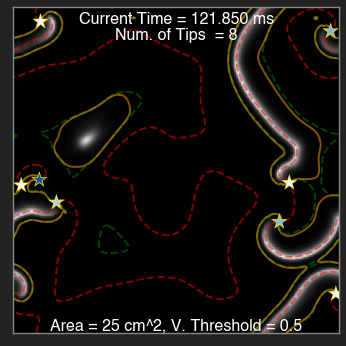

In [18]:
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
save = True; annotating=True; inch = 6; fontsize=16;
vmin_img=0;vmax_img=.2;
V_threshold=0.5; Delta_t=1000;
DS=5./200.;area=int(np.around(width*height*DS**2,2))
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')

#compute discrete flow map
dtxt_dt = zero_txt.copy()
get_time_step(txt, dtxt_dt)
img = txt[..., 0]
dimgdt=dtxt_dt[...,0]
img_nxt=img + Delta_t*dimgdt
#instantaneous tip detection 
retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
# retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2
    
fig=PlotMyDomain(img,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=area,frameno=1,save_fn=save_fn,save_folder=save_folder,save=True,annotating=True)
print(save_fn)

In [19]:
h=0.001
tf=121.85+20*h
txt,t=forward_integrate_to_tf(txt,t,tf,h,zero_txt)

the naive FEI method with large steps gives the same result as the instantaneous number of tips


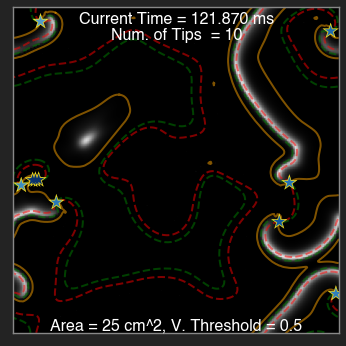

In [20]:
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
save = True; annotating=True; inch = 6; fontsize=16;
vmin_img=0;vmax_img=.2;
V_threshold=0.5; Delta_t=10;
DS=5./200.;area=int(np.around(width*height*DS**2,2))
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_singlestep.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')

#compute discrete flow map
dtxt_dt = zero_txt.copy()
get_time_step(txt, dtxt_dt)
img = txt[..., 0]
dimgdt=dtxt_dt[...,0]
img_nxt=img + Delta_t*dimgdt
#instantaneous tip detection 
# retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2

fig=PlotMyDomain(img,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=area,frameno=1,save_fn=save_fn,save_folder=save_folder,save=True,annotating=True)
print('the naive FEI method with large steps gives the same result as the instantaneous number of tips')

In [134]:
#computing img_nxt by multiple forward time steps
h=0.001
Delta_t=.1#100didn't work#1didn't work? #10 worked
maxk=2
t_copy=float(t); tf=t_copy+Delta_t
txt_copy=txt.copy()
# txt_nxt,_=forward_integrate_to_tf(txt_copy,t_copy,tf,h,zero_txt)
txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf,zero_txt,maxk=maxk)
beep(1)

0

ic_200x200.122.33_t_121.85_t_121.870_DT_0.1_imr_maxk_1.png


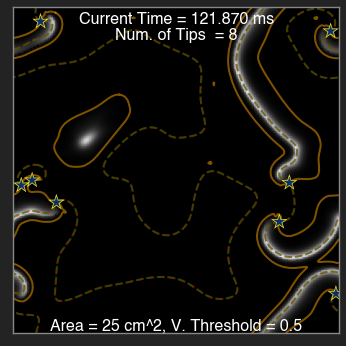

In [133]:
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
save = False; annotating=True; inch = 6; fontsize=16;
vmin_img=0;vmax_img=.2;
V_threshold=0.5; #Delta_t=100#1didn't work? #10 worked
DS=5./200.;area=int(np.around(width*height*DS**2,2))
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_imr_maxk_{maxk}.png'); #**kwargs):
# save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_multistep_h_{h}.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')

#compute discrete flow map
dtxt_dt = zero_txt.copy()
get_time_step(txt, dtxt_dt)
img = txt[..., 0]
dimgdt=dtxt_dt[...,0]
img_nxt=txt_nxt[...,0]
# img_nxt=img + Delta_t*dimgdt
#instantaneous tip detection 
# retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2

fig=PlotMyDomain(img,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=area,frameno=1,save_fn=save_fn,save_folder=save_folder,save=True,annotating=True)
print(save_fn)

__results__ High frequency birth-death event automatically filtered

- ...filtered by multistep time evolution and comparing two frames.  This algorithm can be done for free by keeping a running record going back Delta_t/h frames.
- High frequency birth-death event existed at time $t=121.870$ ms for `ic_200x200.122.33`.
- TODO: Verify results
    - comparing img with img_nxt has worked when the other two combinations (img_nxt with dimg_dt, img with dimg_dt) did not
    - #TODO: plot number of spiral tips versus Delta_t for h=0.001 fixed.
- TODO: Make efficient
    - #TODO: if runtime slow, retry, try making use of the iterative solution to the implicit midpoint rule.  Hint: plot max absolute change in approximate versus iterartion number to demonstrate convergence of IMR for a given number of iterations in a number of frames

In [270]:
@njit
def implicit_integrate_to_tf(txt,t,tf,zero_txt,maxk):
    return implicit_integrate_to(txt,t,tf,zero_txt,maxk)

@njit
def implicit_integrate_to(txt,t,tf,zero_txt,maxk):
    #compute initial discrete flow map
    dtxt_dt = zero_txt.copy()
    get_time_step(txt, dtxt_dt)
    #compute initial approximate
    txtf = (tf-t)*dtxt_dt + txt
    for k in range(maxk):
        #compute next approximate of discrete flow map via the implicit midpoint rule
        txtg = txtf/2. + txt/2.
        dtxt_dt = zero_txt.copy()
        get_time_step(txtg, dtxt_dt)
        #compute the k^th approximate
        txtf = (tf-t)*dtxt_dt + txt
    return txtf,tf

# record the tip number versus time for each simple method over one high frequency birth-death event

In [254]:
forward_integrate_to_tf

CPUDispatcher(<function forward_integrate_to_tf at 0x13294aee0>)

In [21]:
def count_tips_by_method(txt,img,method,h):
    if method==1: #FEI with 1.
        #computing img_nxt by multiple forward time steps
        Delta_t=1.; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=forward_integrate_to_tf(txt_copy,t_copy,tf2,h,zero_txt)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==2: #FEI with .1
        #computing img_nxt by multiple forward time steps
        Delta_t=.1; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=forward_integrate_to_tf(txt_copy,t_copy,tf2,h,zero_txt)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==3: #IMR with .1 and maxk 1
        #computing img_nxt by multiple forward time steps
        Delta_t=.1; maxk=1; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==4: #IMR with .1 and maxk 2
        #computing img_nxt by multiple forward time steps
        Delta_t=.1; maxk=2; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==5: #IMR with .1 and maxk 10
        #computing img_nxt by multiple forward time steps
        Delta_t=.1; maxk=10; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==6: #IMR with .1 and maxk 20
        #computing img_nxt by multiple forward time steps
        Delta_t=.1; maxk=20; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==7: #IMR with .1 and maxk 30
        #computing img_nxt by multiple forward time steps
        Delta_t=.1; maxk=30; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==8: #IMR with -.1 and maxk 20
        #computing img_nxt by multiple forward time steps
        Delta_t=-.1; maxk=20; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    elif method==9: #IMR with -.1 and maxk 2
        #computing img_nxt by multiple forward time steps
        Delta_t=-.1; maxk=20; t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy()
        txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf2,zero_txt,maxk=maxk)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval
    else:
        print(f"Error: method={method} not implemented.")
        return [],[]

In [155]:
h=0.001
img=txt[...,0]
method_lst = sorted(range(1,10))
for method in method_lst:
    n_tips,_=count_tips_by_method(txt,img,method,h)
    print(n_tips)

8
8
8
8
8
8
8
8
8


In [162]:
# input_fn="ic_200x200.122.33.npz"
dir_primed_txt="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85.npz"
input_file_name=dir_primed_txt
txt = load_buffer(input_file_name)
t=121.85
# Delta_t=0.1
V_threshold=0.5
theta_threshold=0.

width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)

In [163]:
tf=122.
h=0.001
FPS=int(1/h*10**3)
method_lst = sorted(range(1,10))
# Delta_t_lst = np.logspace(-2,3,6)
n_tip_lst_dict = dict(zip(method_lst,[[] for d in method_lst]))
n_tips_instant_lst=[]
t_lst=[]
save_every=10
step_count = 0
num_steps=np.ceil((tf-t)/h)
while t<tf:
    if step_count%save_every==0:
        dtxt_dt = zero_txt.copy()
        get_time_step(txt, dtxt_dt)
        img = txt[..., 0]
        dimgdt=dtxt_dt[...,0]
        #calculate contours and tips
        #     contours_img = find_contours(img,         level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
        #     contours_dimgdt = find_contours(dimgdt,   level=0.,fully_connected='low', positive_orientation='low', mode='pbc')
        #     contours_img_nxt = find_contours(img_nxt, level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
        #instantaneous tip detection 
        retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips_instant=x_values.shape[0]
        n_tips_instant_lst.append(n_tips_instant)
        t_lst.append(np.round(t,4))
        
        for method in method_lst:
            n_tips,_=count_tips_by_method(txt,img,method,h)
            n_tip_lst_dict[method].append(n_tips)
    
    #integrate forward in time
    time_step(txt, h, zero_txt)
    t += h
    step_count+=1
    #progress bar that updates after each measurement
    printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"\nthe current tip number is {n_tips}.")

Progress: |█████████████████████████████████████████████████-| 99.3% Complete
the current tip number is 8.


In [164]:
#save the data as csv
FPS=int(10**3/(h*save_every))
output_file_name=os.path.basename(input_file_name).replace('.npz',f'tipnum_vs_time_method_variable_FPS_{FPS:.0e}_t_{np.around(t)}.csv')
input_folder=os.path.dirname(input_file_name)
assert(input_folder)
os.chdir(input_folder)
dict_out=n_tip_lst_dict
dict_out['n_tips_instant']=n_tips_instant_lst
dict_out['t']=t_lst
df=pd.DataFrame(dict_out)
df.to_csv(output_file_name,index=False)
# data to plot
x_values=df.t.values
y_values=df.n_tips_instant.values+1

In [165]:
# #plot the data
# x_values=df.t.values
# y_values=df.n_tips_instant.values+1
# plt.plot(x_values,y_values)
# for Delta_t in Delta_t_lst:
#     plt.plot(x_values,df[Delta_t].values)
# print(Delta_t_lst)
# plt.show()

fig/ic_200x200.122.33_t_121.85tipnum_vs_time_method_variable_FPS_1e+05_t_122.0.png


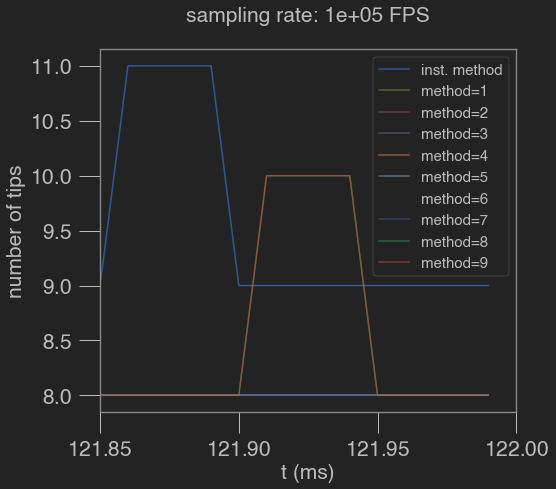

In [170]:
save=True
fontsize=21
save_folder = nb_dir+'/Figures/methods-tip-detection'
# save_folder=nb_dir+'/Data/test_data/methods/fig'
plt.plot(x_values,y_values,label="inst. method",alpha=0.7)

for method in method_lst:
    plt.plot(x_values,df[method].values,label=r"""method={}""".format(method), alpha=0.5)

plt.ylabel('number of tips',fontsize=fontsize)
plt.xlabel('t (ms)',fontsize=fontsize)
plt.title(f'sampling rate: {FPS:.0e} FPS\n',fontsize=fontsize)
plt.tick_params(which='both',size=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.ticklabel_format(style ='scientific',#'sci', # 'plain',# ,})
                     useMathText=True,
                     axis='both')
# plt.xlim([120,124])
plt.xlim([121.85,122])
plt.legend(fontsize=fontsize-6)
if not save:
    plt.show()
else:
    try:
        os.mkdir('fig')
    except:
        pass
    output_fig_file_name='fig/'+output_file_name.replace('.csv','.png')
#     output_fig_file_name='fig/'+output_file_name.replace('.csv','very_zoomed.png')
    plt.tight_layout()
    plt.savefig(output_fig_file_name,dpi=300)
    print(output_fig_file_name)
#     plt.close()

# record the tip number versus time for each simple method over one high frequency birth-death event
- method 8 and 9 displayed a high frequency tip.

In [205]:
# input_fn="ic_200x200.122.33.npz"
dir_primed_txt="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85.npz"
input_file_name=dir_primed_txt
txt = load_buffer(input_file_name)
t=121.85
# Delta_t=0.1
V_threshold=0.5
theta_threshold=0.

width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)

In [258]:
tf=60000.#up to one minute
h=0.001
method_lst = sorted(range(2,8))#10))
n_tip_lst_dict = dict(zip(method_lst,[[] for d in method_lst]))
n_tips_instant_lst=[]
t_lst=[]
save_every=40
step_count = 0
num_steps=np.ceil((tf-t)/h)
while t<tf:
    if step_count%save_every==0:
        dtxt_dt = zero_txt.copy()
        get_time_step(txt, dtxt_dt)
        img = txt[..., 0]
        dimgdt=dtxt_dt[...,0]
        #calculate contours and tips
        #     contours_img = find_contours(img,         level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
        #     contours_dimgdt = find_contours(dimgdt,   level=0.,fully_connected='low', positive_orientation='low', mode='pbc')
        #     contours_img_nxt = find_contours(img_nxt, level=V_threshold,fully_connected='low', positive_orientation='low', mode='pbc')
        #instantaneous tip detection 
        retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips_instant=x_values.shape[0]
        n_tips_instant_lst.append(n_tips_instant)
        t_lst.append(np.round(t,4))
        
        for method in method_lst:
            n_tips,_=count_tips_by_method(txt,img,method,h)
            n_tip_lst_dict[method].append(n_tips)
    
    #integrate forward in time
    time_step(txt, h, zero_txt)
    t += h
    step_count+=1
    #progress bar that updates after each measurement
    printProgressBar(step_count, num_steps, prefix = f'n={n_tips_instant}; Progress:', suffix = 'Complete', length = 50)
beep(3)
print(f"\nthe current tip number is {n_tips_instant}.")

TypeError: tuple indices must be integers or slices, not tuple

In [225]:
#save the data as csv
FPS=int(10**3/(h*save_every))
output_file_name=os.path.basename(input_file_name).replace('.npz',f'tipnum_vs_time_method_variable_FPS_{FPS:.0e}_t_{np.around(t)}.csv')
input_folder=os.path.dirname(input_file_name)
assert(input_folder)
os.chdir(input_folder)
dict_out=n_tip_lst_dict
dict_out['n_tips_instant']=n_tips_instant_lst#[:-1]
dict_out['t']=t_lst#[:-1]
df=pd.DataFrame(dict_out)
df.to_csv(output_file_name,index=False)
# data to plot
x_values=df.t.values
y_values=df.n_tips_instant.values+0
t

1058.5549999816626

In [56]:
# df
# ['2']
# [method]

In [82]:
# output_file_name=search_for_file()
output_file_name="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85tipnum_vs_time_method_variable_FPS_2e+04_t_1059.0.csv"
df=pd.read_csv(output_file_name)
x_values=df.t.values
y_values=df.n_tips_instant.values+0
# df.loc[2]
save_every=40
h=0.001
FPS=int(10**3/(h*save_every))

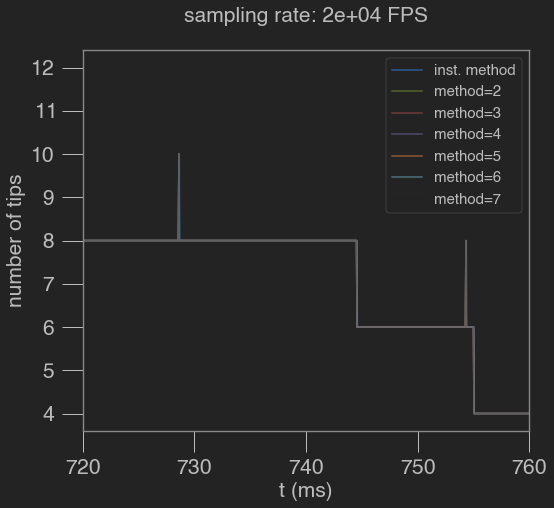

In [76]:
save=False
fontsize=21
save_folder = nb_dir+'/Figures/methods-tip-detection'
# save_folder=nb_dir+'/Data/test_data/methods/fig'
plt.plot(x_values,y_values,label="inst. method",alpha=0.7)

# method_lst=[2,3,4,5,6,7]
method_lst_=[2,3,4,5,6,7]
for method in method_lst_:
#     if (method==9):#|(method!=9):
    try:
        plt.plot(x_values,df[method].values,label=r"""method={}""".format(method), alpha=0.5)
    except:
        plt.plot(x_values,df[f'{method}'].values,label=r"""method={}""".format(method), alpha=0.5)

plt.ylabel('number of tips',fontsize=fontsize)
plt.xlabel('t (ms)',fontsize=fontsize)
plt.title(f'sampling rate: {FPS:.0e} FPS\n',fontsize=fontsize)
plt.tick_params(which='both',size=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.ticklabel_format(style ='scientific',#'sci', # 'plain',# ,})
                     useMathText=True,
                     axis='both')
plt.xlim([720,760])
# plt.xlim([121.85,122])
plt.legend(fontsize=fontsize-6)
if not save:
    plt.show()
else:
    try:
        os.mkdir('fig')
    except:
        pass
    output_fig_file_name='fig/'+output_file_name.replace('.csv','.png')
#     output_fig_file_name='fig/'+output_file_name.replace('.csv','very_zoomed.png')
    plt.tight_layout()
    plt.savefig(output_fig_file_name,dpi=300)
    print(output_fig_file_name)
#     plt.close()

# Zoom in on those high frequency birth death events.  Do they look reasonable? No – because a lag of Delta_t>0.1 is too small.

In [83]:
# df_dir=search_for_file()
df_dir="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85tipnum_vs_time_method_variable_FPS_2e+04_t_1059.0.csv"
df=pd.read_csv(df_dir)

In [77]:
#sus spike A
boo = (df.t>720)&(df.t<730)&(df.n_tips_instant==10)
t_sus_A=float(df[boo].t.values)
print(t_sus_A)
#sus spike B
boo = (df.t>750)&(df.t<760)&(df.n_tips_instant==8)
t_sus_B=float(df[boo].t.values)
print(t_sus_B)

728.65
754.37


In [70]:
# input_fn="ic_200x200.122.33.npz"
dir_primed_txt="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85.npz"
input_file_name=dir_primed_txt
txt = load_buffer(input_file_name)
t=121.85
Delta_t=0.1
V_threshold=0.5
theta_threshold=0.
width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)

In [71]:
h=0.001
tf=t_sus_A
txt,t=forward_integrate_to_tf(txt,t,tf,h,zero_txt)
beep(3)

0

In [17]:
#save the resulting buffer
file_name_primed_txt_sus_A=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.2f}.npz')
folder_name_primed_txt=nb_dir+'/Data/test_data/methods'
os.chdir(folder_name_primed_txt)
# np.savez_compressed(file_name_primed_txt)
np.savez(file_name_primed_txt_sus_A,txt)
print ( 'primed texture saved to:' )
print ( folder_name_primed_txt+'/'+file_name_primed_txt_sus_A )

primed texture saved to:
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_728.66.npz


In [88]:
txt=load_buffer('/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_728.66.npz')
# for j in range(10):
#     time_step(txt, h, zero_txt)
#     t+=h

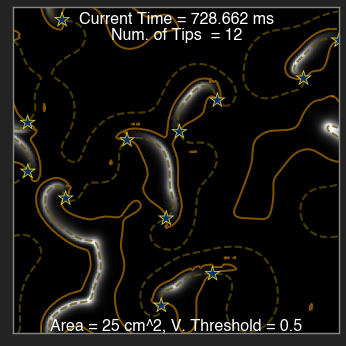

ic_200x200.122.33_t_121.85_t_728.662_DT_0.1_multistep_h_0.001.png


In [87]:
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
save = False; annotating=True; inch = 6; fontsize=16;
vmin_img=0;vmax_img=.2;
V_threshold=0.5; #Delta_t=100#1didn't work? #10 worked
DS=5./200.;area=int(np.around(width*height*DS**2,2))
# save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_imr_maxk_{maxk}.png'); #**kwargs):
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_multistep_h_{h}.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')

#compute discrete flow map
dtxt_dt= zero_txt.copy()
get_time_step(txt, dtxt_dt)
img    = txt[..., 0]
dimgdt =dtxt_dt[...,0]
# img_nxt=txt_nxt[...,0]

# img_nxt=img + Delta_t*dimgdt
#instantaneous tip detection 
# retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
# retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips

method=2
n_tips,retval=count_tips_by_method(txt,img,method=method,h=h)
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2

fig=PlotMyDomain(img,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=area,frameno=1,save_fn=save_fn,save_folder=save_folder,save=save,annotating=annotating)
print(save_fn)

In [89]:
h=0.001
tf=t_sus_B
txt,t=forward_integrate_to_tf(txt,t,tf,h,zero_txt)
beep(3)

0

In [154]:
#save the resulting buffer
file_name_primed_txt_sus_A=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.2f}.npz')
folder_name_primed_txt=nb_dir+'/Data/test_data/methods'
os.chdir(folder_name_primed_txt)
# np.savez_compressed(file_name_primed_txt)
np.savez(file_name_primed_txt_sus_A,txt)
print ( 'primed texture saved to:' )
print ( folder_name_primed_txt+'/'+file_name_primed_txt_sus_A )

primed texture saved to:
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_760.76.npz


In [128]:
txt=load_buffer('/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_755.66.npz')
# txt=load_buffer('/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_754.37.npz')
for j in range(1000):
    time_step(txt, h, zero_txt)
    t+=h

In [126]:
for j in range(1000):
    time_step(txt, h, zero_txt)
    t+=h

In [121]:
h

0.001

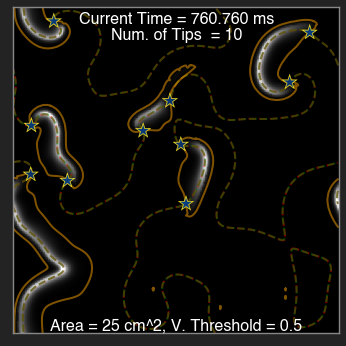

ic_200x200.122.33_t_121.85_t_760.760_DT_0.1_multistep_h_0.001.png


In [174]:
# save_plot_as_png(img, dimgdt, x_values, y_values, c_values, n_tips, t, save_folder, frameno, 
save = False; annotating=True; inch = 6; fontsize=16;
vmin_img=0;vmax_img=.2;
V_threshold=0.5; #Delta_t=100#1didn't work? #10 worked
DS=5./200.;area=int(np.around(width*height*DS**2,2))
# save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_imr_maxk_{maxk}.png'); #**kwargs):
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_multistep_h_{h}.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')

#compute discrete flow map
dtxt_dt= zero_txt.copy()
get_time_step(txt, dtxt_dt)
img    = txt[..., 0]
dimgdt =dtxt_dt[...,0]
# img_nxt=txt_nxt[...,0]

# img_nxt=img + Delta_t*dimgdt
#instantaneous tip detection 
# retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
#finite time tip detection
# retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
# retval = find_intersections(img_nxt,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold) #makes 18 tips

method=1
n_tips,retval=count_tips_by_method(txt,img,method=method,h=h)
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2

fig=PlotMyDomain(img,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=area,frameno=1,save_fn=save_fn,save_folder=save_folder,save=save,annotating=annotating)
print(save_fn)

In [112]:
t_sus_B

754.37

In [148]:
#computing img_nxt by multiple forward time steps
h=0.001
Delta_t=.1#100didn't work#1didn't work? #10 worked
maxk=2
t_copy=float(t); tf=t_copy+Delta_t
txt_copy=txt.copy()
# txt_nxt,_=forward_integrate_to_tf(txt_copy,t_copy,tf,h,zero_txt)
txt_nxt,_=implicit_integrate_to_tf(txt_copy,t_copy,tf,zero_txt,maxk=maxk)
img_nxt=txt_nxt[...,0]
retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#initially makes 16 tips
lst_values_x,lst_values_y,lst_values_theta,lst_values_grad_ux,lst_values_grad_uy,lst_values_grad_vx,lst_values_grad_vy = retval
x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
n_tips=x_values.shape[0]


In [149]:
n_tips

12

__Result__ Virtual spiral tips still erroneously occur for the lagged time step of 0.1ms.  One do not occur, however, when lagging at 1ms.  I have observed that 2ms is slower than all time steps.  _Hypothesis_: if I lag time steps by at a time step longer than the oldest virtual tip event, then it will be impossible for them to occur.

__Method to test__
- 1. detect spiral tip locations at a 1-2ms lag using new (and later, old) values
- 2. map those new values to the nearest instantaneous values

# test 10 one-steps of IMR at .1ms each.  Use this to detect tips and time step simultaneously

In [164]:
#TODO: find a good tradeoff between nsteps and maxk for IMR forward integration by 2ms in terms of runtime

In [179]:
txt=load_buffer('/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_760.76.npz')
t=760.76

In [305]:
tf2=t+.4
nsteps=2
H=(tf2-t)/nsteps
maxk=10
txt_nxt=txt.copy()
t_nxt=float(t)
for j in range(nsteps):
    txt_nxt,t_nxt=implicit_integrate_to_tf(txt_nxt,t_nxt,t_nxt+H,zero_txt,maxk=maxk)

In [300]:
# from lib.model.minimal_model import *
# from lib.viewer import *
# plt.imshow((txt_nxt-txt_nxt2)[...,1])

In [301]:
# txt_nxt2,_=forward_integrate_to_tf(txt_copy,t_copy,tf2,h,zero_txt)

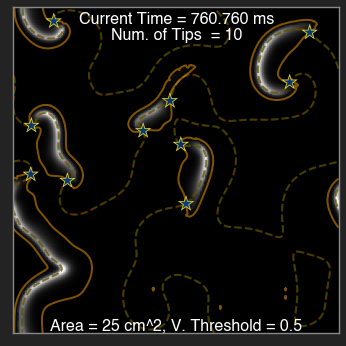

ic_200x200.122.33_t_121.85_t_760.760_DT_0.1_multistep_h_0.001.png


In [372]:
save = False; annotating=True; inch = 6; fontsize=16;
vmin_img=0;vmax_img=.2;
V_threshold=0.5; #Delta_t=100#1didn't work? #10 worked
DS=5./200.;area=int(np.around(width*height*DS**2,2))
# save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_imr_maxk_{maxk}.png'); #**kwargs):
save_fn=os.path.basename(input_file_name).replace('.npz',f'_t_{t:.3f}_DT_{Delta_t}_multistep_h_{h}.png'); #**kwargs):
save_folder=os.path.join(nb_dir,'Figures/methods-tip-detection')

#compute discrete flow map
dtxt_dt= zero_txt.copy()
get_time_step(txt, dtxt_dt)
img    =    txt[...,0]
dimgdt =dtxt_dt[...,0]
img_nxt=txt_nxt[...,0]

retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)#makes 8 tips
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
n_tips=x_values.shape[0]

method=2
# n_tips,retval=count_tips_by_method(txt,img,method=method,h=h)
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
c_values = np.array(lst_values_theta)/np.pi*2

fig=PlotMyDomain(img_nxt,dimgdt,Delta_t,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=0.,vmax_img=0.2,
                 area=area,frameno=1,save_fn=save_fn,save_folder=save_folder,save=save,annotating=annotating)
print(save_fn)

__Results__ it looks like lagging from 0.4-2 ms yielded reasonable tips for this example even when using maxk=2.

# measure with IMR, varying by Delta_t
- SUPRISING RESULT - using a larger number of interations (IMR) lead to 760 spiral tips 
- Delta_t=2; maxk=10; nsteps=2
- Delta_t=2; maxk=10; nsteps=3

In [373]:
def one_big_step(txt, t, Delta_t, zero_txt,maxk=2,nsteps=10):
    tf2=t+Delta_t
    H=(tf2-t)/nsteps
    txt_nxt=txt.copy()
    t_nxt=float(t)
    for j in range(nsteps):
        txt_nxt,t_nxt=implicit_integrate_to(txt_nxt,t_nxt,t_nxt+H,zero_txt,maxk=maxk)
    return txt_nxt

In [610]:
def count_tips_by_method_2(txt,img,t,method,zero_txt):
    '''computing next number of tips and frame using multiple implicit time steps.'''
    if method==1:
        Delta_t=.4; maxk=2; nsteps=2
        txt_copy=txt.copy(); t_copy=float(t); tf2=t_copy+Delta_t
        txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==2: 
        Delta_t=.7; maxk=2; nsteps=2
        txt_copy=txt.copy(); t_copy=float(t); tf2=t_copy+Delta_t
        txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==3: #second fastest method
        Delta_t=1.; maxk=2; nsteps=2
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==4:#fastest method 0.14492082595825195)
        Delta_t=1.5; maxk=2; nsteps=2
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==5:
        Delta_t=0.4; maxk=10; nsteps=2
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt= txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==6:
        Delta_t=2; maxk=2; nsteps=10
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==7: 
        Delta_t=1.; maxk=4; nsteps=5
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==8: 
        Delta_t=.4; maxk=6; nsteps=1
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==9: 
        Delta_t=.1; maxk=6; nsteps=1
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    if method==10: 
        Delta_t=10; maxk=2; nsteps=40
        t_copy=float(t); tf2=t_copy+Delta_t
        txt_copy=txt.copy(); txt_nxt=one_big_step(txt, t, Delta_t, zero_txt=zero_txt,maxk=maxk,nsteps=nsteps)
        img_nxt = txt_nxt[...,0]
        retval = find_intersections(img,img_nxt,level1=V_threshold,level2=V_threshold,theta_threshold=theta_threshold)
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x);y_values = np.array(lst_values_y)
        n_tips=x_values.shape[0]
        return n_tips,retval,txt_nxt,Delta_t
    return False

In [611]:
method_lst = [10]#[1, 2, 3, 4, 5, 6, 7, 8, 9]
start=time.time()
for method in method_lst:
    n_tips,retval,txt_nxt,Delta_t=count_tips_by_method_2(txt,img,t,method,zero_txt)
    end=time.time()
    print((method,n_tips,end-start))
    start=end

(10, 4, 0.9938890933990479)


# test the methods over a long time scale

In [612]:
txt=load_buffer('/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85_t_760.76.npz')
t=760.76

In [613]:
tf=60000.#up to one minute
# method_lst = sorted(range(2,8))#10))
method_lst = [10]#[1, 2, 3, 4, 5, 6, 7, 8, 9]
n_tip_lst_dict = dict(zip(method_lst,[[] for d in method_lst]))
n_tips_instant_lst=[]
t_lst=[]
save_every=1
step_count = 0
num_steps=np.ceil((tf-t)/h)
while t<tf:
    if step_count%save_every==0:
        dtxt_dt = zero_txt.copy()
        get_time_step(txt, dtxt_dt)
        img = txt[..., 0]
        dimgdt=dtxt_dt[...,0]
        #instantaneous tip detection 
        retval = find_intersections(img,dimgdt,level1=V_threshold,level2=0.,theta_threshold=theta_threshold)#initially makes 16 tips
        lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
        x_values = np.array(lst_values_x); y_values = np.array(lst_values_y)
        n_tips_instant=x_values.shape[0]
        n_tips_instant_lst.append(n_tips_instant)
        t_lst.append(np.round(t,4))
        
        for method in method_lst:
            n_tips,retval,txt_nxt,Delta_t=count_tips_by_method_2(txt,img,t,method,zero_txt)
            n_tip_lst_dict[method].append(n_tips)
    
    #integrate forward in time
    txt=txt_nxt
    t += Delta_t
    step_count+=1
    #progress bar that updates after each measurement
    printProgressBar(step_count, num_steps, prefix = f'n_inst={n_tips_instant}; Progress:', suffix = 'Complete', length = 50)
beep(3)
print(f"\nthe current tip number is {n_tips_instant}.")

n_inst=0; Progress: |--------------------------------------------------| 0.0% Completee
the current tip number is 0.


In [617]:
len(n_tip_lst_dict[10])

5924

In [618]:
#save the data as csv
FPS=int(10**3/(h*save_every))
output_file_name=os.path.basename(input_file_name).replace('.npz',f'tipnum_vs_time_DT_variable_FPS_{FPS:.0e}_t_{t:.4f}.csv')
input_folder=os.path.dirname(input_file_name)
assert(input_folder)
os.chdir(input_folder)
dict_out=n_tip_lst_dict
dict_out['n_tips_instant']=n_tips_instant_lst[:-1]
dict_out['t']=t_lst[:-1]
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_out.items() ]))
# df=pd.DataFrame(dict_out)
df.to_csv(output_file_name,index=False)

In [619]:
x_values=df.t.values
y_values=df.n_tips_instant.values

fig/ic_200x200.122.33_t_121.85tipnum_vs_time_DT_variable_FPS_1e+06_t_60000.7600_zoomed.png


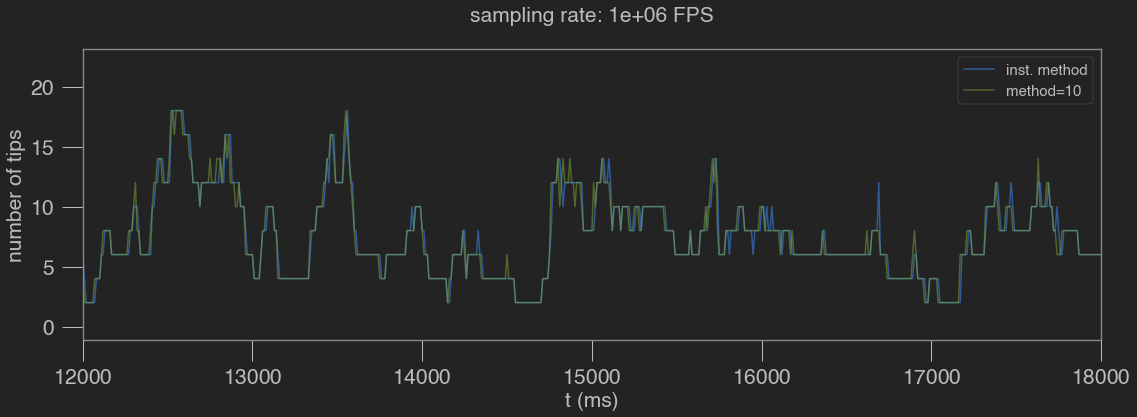

In [627]:
save=True
fontsize=21
save_folder = nb_dir+'/Figures/methods-tip-detection'
# save_folder=nb_dir+'/Data/test_data/methods/fig'
plt.subplots(figsize=(16,6))
plt.plot(x_values,y_values,label="inst. method",alpha=0.7)

# method_lst_=[2,3,4,5,6,7,8,9]
method_lst_=[10]#[7,8,9]
for method in method_lst_:
#     if (method==9):#|(method!=9):
#     try:
    plt.plot(x_values,df[method].values,label=r"""method={}""".format(method), alpha=0.5)
#     except:
#     plt.plot(x_values,df[f'{method}'].values,label=r"""method={}""".format(method), alpha=0.5)

plt.ylabel('number of tips',fontsize=fontsize)
plt.xlabel('t (ms)',fontsize=fontsize)
plt.title(f'sampling rate: {FPS:.0e} FPS\n',fontsize=fontsize)
plt.tick_params(which='both',size=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.ticklabel_format(style ='scientific',#'sci', # 'plain',# ,})
                     useMathText=True,
                     axis='both')
# plt.xlim([910,920])#high freq. bd event for method 3
# plt.xlim([1900,2050])
# plt.xlim([2090,2130])
# plt.xlim([2780,2790])#high freq. bd event for inst. and methods 3,7,8
# plt.xlim([3160,3180])
# plt.xlim([3536,3540])#very high freq. bd event for inst. and methods 3,7,8 (and all methods attempted)
# plt.xlim([3565,3570])
# plt.xlim([3606,3610])#very high freq. bd event for inst. and methods 7,8 
# plt.xlim([3648,3650])

# plt.xlim([0,50000])
plt.xlim([12000,18000])
plt.legend(fontsize=fontsize-6)
if not save:
    plt.show()
else:
    try:
        os.mkdir('fig')
    except:
        pass
    output_fig_file_name='fig/'+output_file_name.replace('.csv','_zoomed.png')
#     output_fig_file_name='fig/'+output_file_name.replace('.csv','very_zoomed.png')
    plt.tight_layout()
    plt.savefig(output_fig_file_name,dpi=300)
    print(output_fig_file_name)
#     plt.close()

In [494]:
df.head()

,1,2,3,4,5,6,7,8,9,n_tips_instant,t
0,10,10,10,10,10.0,10.0,10.0,10.0,12.0,12.0,760.76
1,10,10,10,10,10.0,10.0,10.0,10.0,12.0,12.0,760.86
2,10,10,10,10,10.0,10.0,10.0,10.0,10.0,10.0,760.96
3,10,10,10,10,10.0,10.0,10.0,10.0,10.0,10.0,761.06
4,10,10,10,10,10.0,10.0,10.0,10.0,10.0,10.0,761.16


In [511]:
output_file_name

'ic_200x200.122.33_t_121.85tipnum_vs_time_DT_variable_FPS_1e+06_t_4014.8600.csv'

In [614]:
1

1

# plot birth death rates for ^these various methods

In [49]:
folder='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods'
# file_name='ic_200x200.122.33_t_121.85tipnum_vs_time_DT_variable_FPS_1e+06_t_60000.7600.csv'
# col_lst=['10','n_tips_instant']
# search_for_file()
file_name='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/methods/ic_200x200.122.33_t_121.85tipnum_vs_time_DT_variable_FPS_1e+06_t_4014.8600.csv'

In [51]:
os.chdir(folder)
df_in=pd.read_csv(file_name)

t_values=df_in.t.values
col_lst=['1','2','3','4','5','6','7','8','9','n_tips_instant']

In [151]:
col=col_lst[-10]




#compute birth death rates for column, col
n_values=df_in[col].values
df = pd.DataFrame({"t":t_values,"n":n_values})
df['dn'] = df.n.diff().shift(-1)
df = df.query('dn != 0').copy()
rates = 1/df['t'].diff().shift(-1).dropna() # birth death rates in unites of 1/ms
df['rates'] = rates

## visualize birth death rates

In [152]:
# file_out = "../consolidated_rates.csv"
# os.chdir(folder_name)

min_time_between_samples = 1
# os.chdir(base_folder)
# file_out = f'consolidated_rates-sampled-every-{min_time_between_samples}-ms.csv'
max_rate = .3

# #import data
# os.chdir(base_folder)
# df = pd.read_csv(file_out)

#drop termination times
df.dropna(inplace=True)

#drop rows with rates over 100/ms
df = df.loc[df.rates<=max_rate].copy()

# df = df.loc[df.rates<=0.02].copy()
# df = df.loc[df.rates<=0.1].copy()

dn_list = sorted(set(df.dn.values))
dn_list = [-2,2]

In [153]:
np.mean(df.n.values)

8.393700787401574

In [154]:
#compute median rates and IQR for the error bars corresponding to each category in dn_list
errorbar_data_list = []
for dn in dn_list:  
    #iterate over n for each dn
    df2 = df.loc[df.dn==dn].copy()
    n_list = sorted(set(df2.n.values))
    y_val_list = []
    y_err_1_list = []
    y_err_2_list = []
    for n in n_list:
        df3 = df2.loc[df2.n == n].copy()
        y_val, y_err_1, y_err_2 = df3.describe().T[['50%', '25%', '75%']].loc['rates'].values
        y_err_2 = float(y_err_2 - y_val)
        y_err_1 = float(y_val - y_err_1)
        y_val = float(y_val)
        y_val_list.append(y_val)
        y_err_1_list.append(y_err_1)
        y_err_2_list.append(y_err_2)
    # errorbar_data = (dn, n_list, y_val_list, y_err_1_list, y_err_2_list)
    errorbar_data = {'dn':dn, 
                     'n_list':n_list, 
                     'y_val_list':y_val_list, 
                     'y_err_1_list':y_err_1_list, 
                     'y_err_2_list':y_err_2_list
                    }
    errorbar_data_list.append(errorbar_data)    

In [155]:
#retrieve scatter plot data points for each category in dn_list
scatter_data_list = []
for dn in dn_list:  
    df2 = df.loc[df.dn==dn].copy()
    x_values = df2.n.values
    y_values = df2.rates.values
    scatter_data = {'dn':dn, 
                     'x_values':x_values, 
                     'y_values':y_values, 
                    }
    scatter_data_list.append(scatter_data)

In [156]:
#assign a color/label/other formatting to each category in dn_list
color_list_raw = ['red', 'blue', 'green', 'orange', 'brown', 'purple']
formatting_data_list = []
for i, dn in enumerate(dn_list):
    formatting_data = {
        'dn': dn,
        'color': color_list_raw[i],
        'label':f'$W_{{{int(dn):+d}}}$'
    }
    formatting_data_list.append(formatting_data)   

In [157]:
assert (len(formatting_data_list) is len(scatter_data_list ))
assert (len(formatting_data_list) is len(errorbar_data_list))

saved figure in 
	birth_death_rates_ic_200x200.122.33_col_1_early.png.


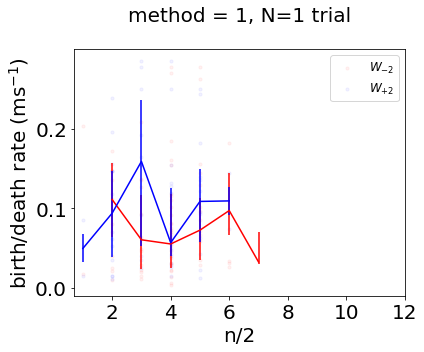

In [158]:
saving = True

savefig_dir = f'{nb_dir}/Figures/methods'
savefig_fn = f"birth_death_rates_{os.path.basename(file_name[:file_name.find('_t_')])}_col_{col}_early.png"
log_scale = False
fontsize=20
figsize=(6,5)

# def birth_death_plot(*y_axis_struct_list):

# plot birth death rates with IQR y error bars with n on the x axis
fig, ax = plt.subplots(figsize=figsize)
for scatter_data, errorbar_data, formatting_data in zip(
    scatter_data_list, errorbar_data_list, formatting_data_list):

    dn, x_values, y_values = scatter_data.values()
    dn, n_list, y_val_list, y_err_1_list, y_err_2_list = errorbar_data.values()
    dn, color, label = formatting_data.values()
    yerr = np.array(list(zip(y_err_1_list,y_err_2_list))).T
    if scatter_data['dn'] == -2:
        delta = 1
    else:
        delta = 0
    ax.scatter(x=x_values/2-delta,y=y_values, c=color, s=10, alpha=0.05, label=label)
    ax.errorbar([n/2 for n in n_list], y_val_list, yerr=yerr, c=color)
    
plt.title(f'method = {col}, N=1 trial\n', fontsize=fontsize)
# ax.legend(loc='top')

ax.set_xticks([2,4,6,8, 10, 12])
# # ax.set_yticks([0,10,20,30,40,50])
# ymin, ymax = ax.get_ylim()
# ax.set_ylim((1e-3,0.4))

ax.legend(loc='best', fontsize= fontsize-8)
ax.tick_params(axis='both', labelsize= fontsize)
ax.set_ylabel('birth/death rate (ms$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('n/2', fontsize=fontsize) 
if log_scale:
    ax.set_yscale('log')
# ax.set_title(f'$\sigma = {sigma}$, threshold = {threshold}', fontsize=fontsize)
                    
# ax.set_title('high frequency birth deaths observed', fontsize=fontsize)
# ax.axis([20,60,0,7])
  
    
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}.")


In [159]:
savefig_fn

'birth_death_rates_ic_200x200.122.33_col_1_early.png'

In [150]:
savefig_fn

'birth_death_rates_ic_200x200.122.33_col_2_early.png'

In [160]:
!pwd

/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods


In [4]:
interpolate_states

CPUDispatcher(<function interpolate_states at 0x112c7cee0>)